In [74]:
import pandas as pd
import numpy as np
import numpy.random as r
from sklearn.model_selection import train_test_split
import math
pd.set_option('display.max_columns', None)

## Dataset creation

In [75]:
df = pd.read_csv('Mushroom_dataset')

In [76]:
df

,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE.1,TAPERING,BULBOUS,SMOOTH.1,SMOOTH.2,WHITE.2,WHITE.3,PARTIAL,WHITE.4,ONE,PENDANT,PURPLE,SEVERAL,WOODS
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,?,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [77]:
df.describe()

,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE.1,TAPERING,BULBOUS,SMOOTH.1,SMOOTH.2,WHITE.2,WHITE.3,PARTIAL,WHITE.4,ONE,PENDANT,PURPLE,SEVERAL,WOODS
count,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415,8415
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4487,3795,3268,2320,5040,3808,8199,6824,5880,1728,4863,3799,5315,5075,4743,4639,8415,8215,7767,3967,2424,4063,3159


In [78]:
for col in (df.loc[:, df.columns != 'EDIBLE']):
    df = (pd.concat([df,pd.get_dummies(df[col], prefix=col)],axis=1)).drop([col],axis=1)

In [79]:
df['EDIBLE'].replace(['POISONOUS', 'EDIBLE'],
                        [0, 1], inplace=True)

In [80]:
df[5000:]

,EDIBLE,CONVEX_BELL,CONVEX_CONICAL,CONVEX_CONVEX,CONVEX_FLAT,CONVEX_KNOBBED,CONVEX_SUNKEN,SMOOTH_FIBROUS,SMOOTH_GROOVES,SMOOTH_SCALY,SMOOTH_SMOOTH,WHITE_BROWN,WHITE_BUFF,WHITE_CINNAMON,WHITE_GRAY,WHITE_GREEN,WHITE_PINK,WHITE_PURPLE,WHITE_RED,WHITE_WHITE,WHITE_YELLOW,BRUISES_BRUISES,BRUISES_NO,ALMOND_ALMOND,ALMOND_ANISE,ALMOND_CREOSOTE,ALMOND_FISHY,ALMOND_FOUL,ALMOND_MUSTY,ALMOND_NONE,ALMOND_PUNGENT,ALMOND_SPICY,FREE_ATTACHED,FREE_FREE,CROWDED_CLOSE,CROWDED_CROWDED,NARROW_BROAD,NARROW_NARROW,WHITE.1_BLACK,WHITE.1_BROWN,WHITE.1_BUFF,WHITE.1_CHOCOLATE,WHITE.1_GRAY,WHITE.1_GREEN,WHITE.1_ORANGE,WHITE.1_PINK,WHITE.1_PURPLE,WHITE.1_RED,WHITE.1_WHITE,WHITE.1_YELLOW,TAPERING_ENLARGING,TAPERING_TAPERING,BULBOUS_?,BULBOUS_BULBOUS,BULBOUS_CLUB,BULBOUS_EQUAL,BULBOUS_ROOTED,SMOOTH.1_FIBROUS,SMOOTH.1_SCALY,SMOOTH.1_SILKY,SMOOTH.1_SMOOTH,SMOOTH.2_FIBROUS,SMOOTH.2_SCALY,SMOOTH.2_SILKY,SMOOTH.2_SMOOTH,WHITE.2_BROWN,WHITE.2_BUFF,WHITE.2_CINNAMON,WHITE.2_GRAY,WHITE.2_ORANGE,WHITE.2_PINK,WHITE.2_RED,WHITE.2_WHITE,WHITE.2_YELLOW,WHITE.3_BROWN,WHITE.3_BUFF,WHITE.3_CINNAMON,WHITE.3_GRAY,WHITE.3_ORANGE,WHITE.3_PINK,WHITE.3_RED,WHITE.3_WHITE,WHITE.3_YELLOW,PARTIAL_PARTIAL,WHITE.4_BROWN,WHITE.4_ORANGE,WHITE.4_WHITE,WHITE.4_YELLOW,ONE_NONE,ONE_ONE,ONE_TWO,PENDANT_EVANESCENT,PENDANT_FLARING,PENDANT_LARGE,PENDANT_NONE,PENDANT_PENDANT,PURPLE_BLACK,PURPLE_BROWN,PURPLE_BUFF,PURPLE_CHOCOLATE,PURPLE_GREEN,PURPLE_ORANGE,PURPLE_PURPLE,PURPLE_WHITE,PURPLE_YELLOW,SEVERAL_ABUNDANT,SEVERAL_CLUSTERED,SEVERAL_NUMEROUS,SEVERAL_SCATTERED,SEVERAL_SEVERAL,SEVERAL_SOLITARY,WOODS_GRASSES,WOODS_LEAVES,WOODS_MEADOWS,WOODS_PATHS,WOODS_URBAN,WOODS_WASTE,WOODS_WOODS
5000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5001,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
5002,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5003,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5004,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8411,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8412,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

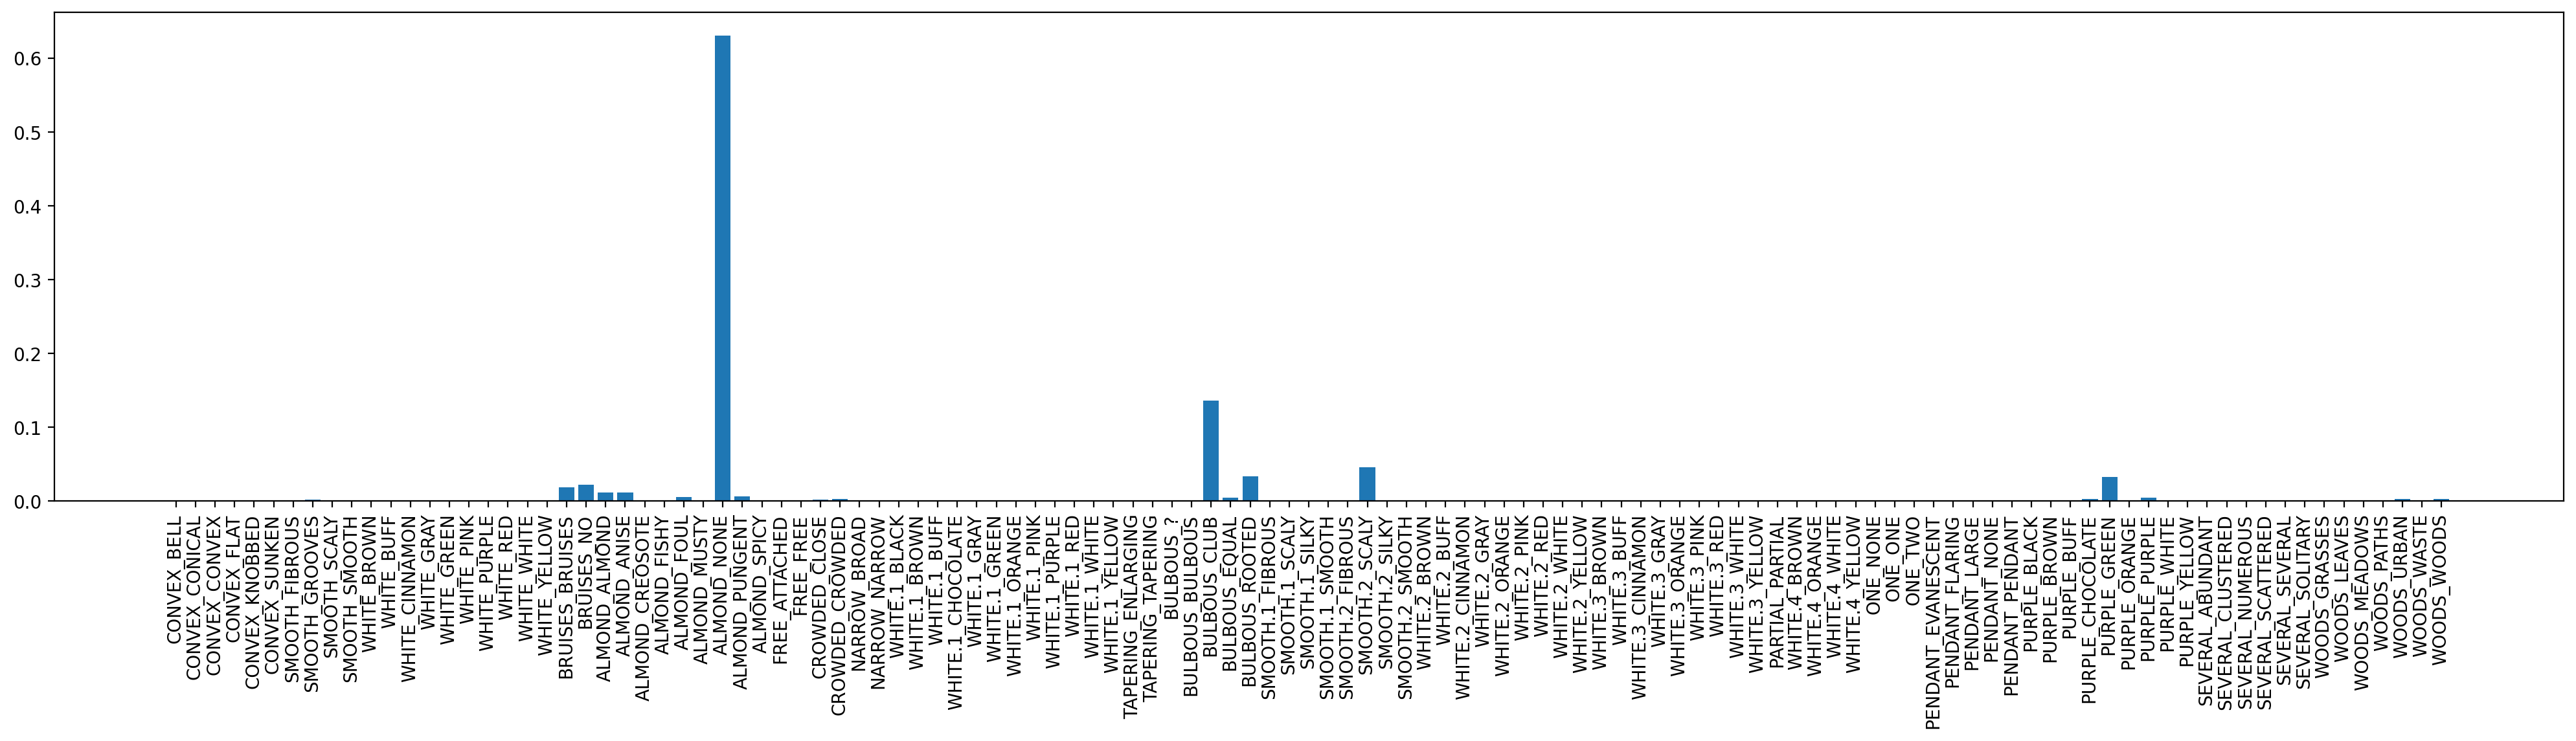

In [59]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
clf = RandomForestRegressor()
clf.fit(df.loc[:, df.columns != 'EDIBLE'], df['EDIBLE'])
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(25,5),dpi=200)
plt.bar((df.loc[:, df.columns != 'EDIBLE']).columns, clf.feature_importances_)
plt.xticks(rotation=90)

In [60]:
df_cor = df
df_cor.corr().abs().style.background_gradient(cmap='YlOrRd')

C:\Users\Evgenii\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Evgenii\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [69]:
pd.unique(df['PARTIAL_PARTIAL'])

array([1], dtype=uint8)

In [70]:
# df = df.drop(columns=['PARTIAL_PARTIAL'],axis=1)

In [71]:
df.columns

Index(['EDIBLE', 'CONVEX_BELL', 'CONVEX_CONICAL', 'CONVEX_CONVEX',
       'CONVEX_FLAT', 'CONVEX_KNOBBED', 'CONVEX_SUNKEN', 'SMOOTH_FIBROUS',
       'SMOOTH_GROOVES', 'SMOOTH_SCALY',
       ...
       'SEVERAL_SCATTERED', 'SEVERAL_SEVERAL', 'SEVERAL_SOLITARY',
       'WOODS_GRASSES', 'WOODS_LEAVES', 'WOODS_MEADOWS', 'WOODS_PATHS',
       'WOODS_URBAN', 'WOODS_WASTE', 'WOODS_WOODS'],
      dtype='object', length=117)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'EDIBLE'], df['EDIBLE'], test_size=0.2, random_state=42)

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
model = Sequential([
    Dense(250, activation='linear', input_shape=(117,)),
    Dense(1, activation='linear')
])

In [12]:
model.compile(optimizer='SGD', loss='mse',metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=6732, epochs=20, verbose=1, 
                    callbacks=
                   [
                        tf.keras.callbacks.ModelCheckpoint(
                            'best_models/', monitor='val_loss', verbose=1, 
                            save_best_only=True, save_weights_only=False, 
                            mode='min', save_freq='epoch')
                    ]
                   )

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7628 - accuracy: 0.4777
Epoch 1: val_loss improved from inf to 0.24696, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 1s/step - loss: 0.7628 - accuracy: 0.4777 - val_loss: 0.2470 - val_accuracy: 0.6435
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2522 - accuracy: 0.6346
Epoch 2: val_loss improved from 0.24696 to 0.20163, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 530ms/step - loss: 0.2522 - accuracy: 0.6346 - val_loss: 0.2016 - val_accuracy: 0.7249
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.7139
Epoch 3: val_loss improved from 0.20163 to 0.18039, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 600ms/step - loss: 0.20

Epoch 24/100
1/1 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9247
Epoch 24: val_loss improved from 0.08160 to 0.08013, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 596ms/step - loss: 0.0779 - accuracy: 0.9247 - val_loss: 0.0801 - val_accuracy: 0.9234
Epoch 25/100
1/1 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9262
Epoch 25: val_loss improved from 0.08013 to 0.07872, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 544ms/step - loss: 0.0765 - accuracy: 0.9262 - val_loss: 0.0787 - val_accuracy: 0.9257
Epoch 26/100
1/1 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9274
Epoch 26: val_loss improved from 0.07872 to 0.07738, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 0s 498ms/step

Epoch 47/100
1/1 [==============================] - ETA: 0s - loss: 0.0560 - accuracy: 0.9556
Epoch 47: val_loss improved from 0.05873 to 0.05807, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 0s 448ms/step - loss: 0.0560 - accuracy: 0.9556 - val_loss: 0.0581 - val_accuracy: 0.9519
Epoch 48/100
1/1 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9562
Epoch 48: val_loss improved from 0.05807 to 0.05742, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 686ms/step - loss: 0.0553 - accuracy: 0.9562 - val_loss: 0.0574 - val_accuracy: 0.9531
Epoch 49/100
1/1 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9566
Epoch 49: val_loss improved from 0.05742 to 0.05678, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 546ms/step

Epoch 70/100
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9660
Epoch 70: val_loss improved from 0.04676 to 0.04636, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 0s 430ms/step - loss: 0.0447 - accuracy: 0.9660 - val_loss: 0.0464 - val_accuracy: 0.9638
Epoch 71/100
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9661
Epoch 71: val_loss improved from 0.04636 to 0.04596, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 525ms/step - loss: 0.0443 - accuracy: 0.9661 - val_loss: 0.0460 - val_accuracy: 0.9638
Epoch 72/100
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9663
Epoch 72: val_loss improved from 0.04596 to 0.04558, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 0s 473ms/step

Epoch 93/100
1/1 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9703
Epoch 93: val_loss improved from 0.03917 to 0.03890, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 535ms/step - loss: 0.0375 - accuracy: 0.9703 - val_loss: 0.0389 - val_accuracy: 0.9691
Epoch 94/100
1/1 [==============================] - ETA: 0s - loss: 0.0372 - accuracy: 0.9704
Epoch 94: val_loss improved from 0.03890 to 0.03864, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 0s 480ms/step - loss: 0.0372 - accuracy: 0.9704 - val_loss: 0.0386 - val_accuracy: 0.9691
Epoch 95/100
1/1 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9707
Epoch 95: val_loss improved from 0.03864 to 0.03838, saving model to best_models\
INFO:tensorflow:Assets written to: best_models\assets
1/1 [==============================] - 1s 611ms/step

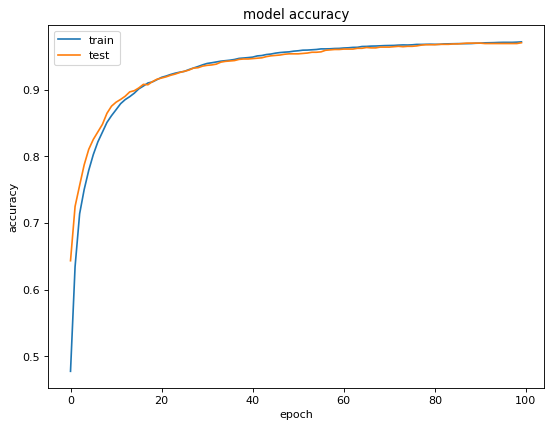

In [13]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model creation

In [23]:
def init_params():
    W1 = np.random.rand(250, 117)
    W2 = np.random.rand(1, 250)
#     W3 = r.randint(4,7,(1, 50))/100
    return W1, W2 #, W3

def sigmoid(x):
    x_sig = np.zeros((np.shape(x)[0],np.shape(x)[1]))
    for i in range(np.shape(x)[0]):
        for j in range(np.shape(x)[1]):
            x_sig[i][j] = 1 / (1 + np.exp(-x[i][j]))
    return x_sig

def sigmoid_der(x):
    return sigmoid(x).dot((1 - sigmoid(x)).T)
    
def forward_prop(W1, W2, X):
    Z1 = W1.dot(X.T)
    A1 = (Z1)
    Z2 = W2.dot(A1)
    A2 = (Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
#     one_hot_Y = one_hot(Y)
    m = len(Y)
    dZ2 = ((A2 - Y).T)
    dW2 = 1 / m * (dZ2.T).dot(A1.T)
    dZ1 = (((W2.T).dot(dZ2.T)).T)
    dW1 = 1 / m * (dZ1.T).dot(X)
    return dW1, dW2

def update_params(W1, W2, dW1, dW2, alpha):
    W1 = W1 - alpha * dW1   
    W2 = W2 - alpha * dW2    
    return W1, W2

In [24]:
def get_predictions(A2_scores):
    A2 = np.copy(A2_scores)
    for i in range(len(A2[0])):
        if A2_scores[0][i]>0.5: 
            A2[0][i]=1
        else: A2[0][i]=0
    return A2

def get_accuracy(predictions, Y):
#     print(predictions, Y,np.sum(predictions == Y))
    return np.sum(predictions == Y) / Y.size

In [25]:
def gradient_descent(X, Y, X_val, y_val, alpha, iterations):
    W1, W2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, W2, X)
#         print(A2)
        dW1, dW2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
#         print(dW1)
        W1, W2 = update_params(W1, W2, dW1, dW2, alpha)
        if i % 10 == 0:
            
            predictions = get_predictions(A2)
            _, _, _, A2_val_scores = forward_prop(W1, W2, X_val)
            predictions_val = get_predictions(A2_val_scores)
            print(f"epoch: [{i}/{iterations}], train_acc={np.round(get_accuracy(predictions, Y),3)},\
            val_acc={np.round(get_accuracy(predictions_val, y_val),3)}")
            
    return W1, W2

In [43]:
W1, W2 = gradient_descent(X_train, y_train, X_test, y_test, 0.0001, 15000)

epoch: [0/15000], train_acc=0.532,            val_acc=0.463
epoch: [10/15000], train_acc=0.599,            val_acc=0.576
epoch: [20/15000], train_acc=0.594,            val_acc=0.559
epoch: [30/15000], train_acc=0.579,            val_acc=0.54
epoch: [40/15000], train_acc=0.563,            val_acc=0.528
epoch: [50/15000], train_acc=0.551,            val_acc=0.514
epoch: [60/15000], train_acc=0.538,            val_acc=0.497
epoch: [70/15000], train_acc=0.527,            val_acc=0.49
epoch: [80/15000], train_acc=0.512,            val_acc=0.475
epoch: [90/15000], train_acc=0.498,            val_acc=0.46
epoch: [100/15000], train_acc=0.483,            val_acc=0.451
epoch: [110/15000], train_acc=0.469,            val_acc=0.441
epoch: [120/15000], train_acc=0.456,            val_acc=0.429
epoch: [130/15000], train_acc=0.443,            val_acc=0.42
epoch: [140/15000], train_acc=0.431,            val_acc=0.405
epoch: [150/15000], train_acc=0.421,            val_acc=0.39
epoch: [160/15000], trai

epoch: [1330/15000], train_acc=0.646,            val_acc=0.643
epoch: [1340/15000], train_acc=0.647,            val_acc=0.645
epoch: [1350/15000], train_acc=0.648,            val_acc=0.645
epoch: [1360/15000], train_acc=0.65,            val_acc=0.646
epoch: [1370/15000], train_acc=0.651,            val_acc=0.647
epoch: [1380/15000], train_acc=0.652,            val_acc=0.648
epoch: [1390/15000], train_acc=0.653,            val_acc=0.648
epoch: [1400/15000], train_acc=0.654,            val_acc=0.649
epoch: [1410/15000], train_acc=0.656,            val_acc=0.65
epoch: [1420/15000], train_acc=0.657,            val_acc=0.651
epoch: [1430/15000], train_acc=0.657,            val_acc=0.652
epoch: [1440/15000], train_acc=0.658,            val_acc=0.652
epoch: [1450/15000], train_acc=0.66,            val_acc=0.653
epoch: [1460/15000], train_acc=0.661,            val_acc=0.656
epoch: [1470/15000], train_acc=0.662,            val_acc=0.658
epoch: [1480/15000], train_acc=0.662,            val_acc=0

epoch: [2640/15000], train_acc=0.746,            val_acc=0.732
epoch: [2650/15000], train_acc=0.747,            val_acc=0.732
epoch: [2660/15000], train_acc=0.747,            val_acc=0.733
epoch: [2670/15000], train_acc=0.747,            val_acc=0.735
epoch: [2680/15000], train_acc=0.748,            val_acc=0.735
epoch: [2690/15000], train_acc=0.748,            val_acc=0.736
epoch: [2700/15000], train_acc=0.749,            val_acc=0.736
epoch: [2710/15000], train_acc=0.749,            val_acc=0.736
epoch: [2720/15000], train_acc=0.75,            val_acc=0.737
epoch: [2730/15000], train_acc=0.75,            val_acc=0.737
epoch: [2740/15000], train_acc=0.75,            val_acc=0.737
epoch: [2750/15000], train_acc=0.75,            val_acc=0.737
epoch: [2760/15000], train_acc=0.751,            val_acc=0.738
epoch: [2770/15000], train_acc=0.751,            val_acc=0.738
epoch: [2780/15000], train_acc=0.752,            val_acc=0.737
epoch: [2790/15000], train_acc=0.753,            val_acc=0.

epoch: [3950/15000], train_acc=0.795,            val_acc=0.796
epoch: [3960/15000], train_acc=0.796,            val_acc=0.797
epoch: [3970/15000], train_acc=0.796,            val_acc=0.799
epoch: [3980/15000], train_acc=0.797,            val_acc=0.8
epoch: [3990/15000], train_acc=0.797,            val_acc=0.8
epoch: [4000/15000], train_acc=0.797,            val_acc=0.8
epoch: [4010/15000], train_acc=0.797,            val_acc=0.8
epoch: [4020/15000], train_acc=0.797,            val_acc=0.801
epoch: [4030/15000], train_acc=0.798,            val_acc=0.802
epoch: [4040/15000], train_acc=0.799,            val_acc=0.803
epoch: [4050/15000], train_acc=0.799,            val_acc=0.805
epoch: [4060/15000], train_acc=0.799,            val_acc=0.805
epoch: [4070/15000], train_acc=0.8,            val_acc=0.803
epoch: [4080/15000], train_acc=0.8,            val_acc=0.803
epoch: [4090/15000], train_acc=0.801,            val_acc=0.803
epoch: [4100/15000], train_acc=0.801,            val_acc=0.803
epoc

epoch: [5260/15000], train_acc=0.84,            val_acc=0.83
epoch: [5270/15000], train_acc=0.84,            val_acc=0.83
epoch: [5280/15000], train_acc=0.841,            val_acc=0.83
epoch: [5290/15000], train_acc=0.841,            val_acc=0.83
epoch: [5300/15000], train_acc=0.841,            val_acc=0.83
epoch: [5310/15000], train_acc=0.841,            val_acc=0.831
epoch: [5320/15000], train_acc=0.842,            val_acc=0.832
epoch: [5330/15000], train_acc=0.842,            val_acc=0.832
epoch: [5340/15000], train_acc=0.842,            val_acc=0.832
epoch: [5350/15000], train_acc=0.842,            val_acc=0.834
epoch: [5360/15000], train_acc=0.843,            val_acc=0.834
epoch: [5370/15000], train_acc=0.843,            val_acc=0.835
epoch: [5380/15000], train_acc=0.843,            val_acc=0.835
epoch: [5390/15000], train_acc=0.844,            val_acc=0.836
epoch: [5400/15000], train_acc=0.843,            val_acc=0.836
epoch: [5410/15000], train_acc=0.843,            val_acc=0.836

epoch: [6570/15000], train_acc=0.873,            val_acc=0.865
epoch: [6580/15000], train_acc=0.873,            val_acc=0.865
epoch: [6590/15000], train_acc=0.873,            val_acc=0.865
epoch: [6600/15000], train_acc=0.873,            val_acc=0.865
epoch: [6610/15000], train_acc=0.874,            val_acc=0.865
epoch: [6620/15000], train_acc=0.874,            val_acc=0.865
epoch: [6630/15000], train_acc=0.874,            val_acc=0.865
epoch: [6640/15000], train_acc=0.874,            val_acc=0.866
epoch: [6650/15000], train_acc=0.875,            val_acc=0.866
epoch: [6660/15000], train_acc=0.875,            val_acc=0.866
epoch: [6670/15000], train_acc=0.875,            val_acc=0.866
epoch: [6680/15000], train_acc=0.876,            val_acc=0.867
epoch: [6690/15000], train_acc=0.876,            val_acc=0.867
epoch: [6700/15000], train_acc=0.876,            val_acc=0.867
epoch: [6710/15000], train_acc=0.876,            val_acc=0.867
epoch: [6720/15000], train_acc=0.876,            val_ac

epoch: [7880/15000], train_acc=0.899,            val_acc=0.89
epoch: [7890/15000], train_acc=0.899,            val_acc=0.891
epoch: [7900/15000], train_acc=0.899,            val_acc=0.891
epoch: [7910/15000], train_acc=0.899,            val_acc=0.891
epoch: [7920/15000], train_acc=0.9,            val_acc=0.891
epoch: [7930/15000], train_acc=0.9,            val_acc=0.891
epoch: [7940/15000], train_acc=0.9,            val_acc=0.891
epoch: [7950/15000], train_acc=0.9,            val_acc=0.891
epoch: [7960/15000], train_acc=0.9,            val_acc=0.892
epoch: [7970/15000], train_acc=0.9,            val_acc=0.892
epoch: [7980/15000], train_acc=0.901,            val_acc=0.892
epoch: [7990/15000], train_acc=0.901,            val_acc=0.892
epoch: [8000/15000], train_acc=0.901,            val_acc=0.892
epoch: [8010/15000], train_acc=0.901,            val_acc=0.893
epoch: [8020/15000], train_acc=0.901,            val_acc=0.894
epoch: [8030/15000], train_acc=0.901,            val_acc=0.894
epoch

epoch: [9190/15000], train_acc=0.915,            val_acc=0.909
epoch: [9200/15000], train_acc=0.916,            val_acc=0.91
epoch: [9210/15000], train_acc=0.916,            val_acc=0.91
epoch: [9220/15000], train_acc=0.916,            val_acc=0.91
epoch: [9230/15000], train_acc=0.916,            val_acc=0.91
epoch: [9240/15000], train_acc=0.916,            val_acc=0.91
epoch: [9250/15000], train_acc=0.916,            val_acc=0.91
epoch: [9260/15000], train_acc=0.917,            val_acc=0.91
epoch: [9270/15000], train_acc=0.917,            val_acc=0.91
epoch: [9280/15000], train_acc=0.916,            val_acc=0.91
epoch: [9290/15000], train_acc=0.917,            val_acc=0.911
epoch: [9300/15000], train_acc=0.917,            val_acc=0.911
epoch: [9310/15000], train_acc=0.917,            val_acc=0.911
epoch: [9320/15000], train_acc=0.917,            val_acc=0.911
epoch: [9330/15000], train_acc=0.917,            val_acc=0.911
epoch: [9340/15000], train_acc=0.917,            val_acc=0.912
e

epoch: [10500/15000], train_acc=0.926,            val_acc=0.92
epoch: [10510/15000], train_acc=0.926,            val_acc=0.92
epoch: [10520/15000], train_acc=0.926,            val_acc=0.92
epoch: [10530/15000], train_acc=0.926,            val_acc=0.92
epoch: [10540/15000], train_acc=0.926,            val_acc=0.921
epoch: [10550/15000], train_acc=0.926,            val_acc=0.921
epoch: [10560/15000], train_acc=0.926,            val_acc=0.921
epoch: [10570/15000], train_acc=0.926,            val_acc=0.921
epoch: [10580/15000], train_acc=0.926,            val_acc=0.921
epoch: [10590/15000], train_acc=0.926,            val_acc=0.921
epoch: [10600/15000], train_acc=0.926,            val_acc=0.921
epoch: [10610/15000], train_acc=0.926,            val_acc=0.921
epoch: [10620/15000], train_acc=0.926,            val_acc=0.921
epoch: [10630/15000], train_acc=0.926,            val_acc=0.922
epoch: [10640/15000], train_acc=0.926,            val_acc=0.922
epoch: [10650/15000], train_acc=0.927,      

epoch: [11790/15000], train_acc=0.934,            val_acc=0.931
epoch: [11800/15000], train_acc=0.934,            val_acc=0.931
epoch: [11810/15000], train_acc=0.935,            val_acc=0.931
epoch: [11820/15000], train_acc=0.935,            val_acc=0.931
epoch: [11830/15000], train_acc=0.935,            val_acc=0.931
epoch: [11840/15000], train_acc=0.935,            val_acc=0.931
epoch: [11850/15000], train_acc=0.935,            val_acc=0.931
epoch: [11860/15000], train_acc=0.935,            val_acc=0.931
epoch: [11870/15000], train_acc=0.935,            val_acc=0.931
epoch: [11880/15000], train_acc=0.935,            val_acc=0.931
epoch: [11890/15000], train_acc=0.935,            val_acc=0.931
epoch: [11900/15000], train_acc=0.935,            val_acc=0.931
epoch: [11910/15000], train_acc=0.935,            val_acc=0.931
epoch: [11920/15000], train_acc=0.935,            val_acc=0.931
epoch: [11930/15000], train_acc=0.935,            val_acc=0.931
epoch: [11940/15000], train_acc=0.936,  

epoch: [13080/15000], train_acc=0.939,            val_acc=0.934
epoch: [13090/15000], train_acc=0.939,            val_acc=0.934
epoch: [13100/15000], train_acc=0.939,            val_acc=0.934
epoch: [13110/15000], train_acc=0.939,            val_acc=0.934
epoch: [13120/15000], train_acc=0.939,            val_acc=0.934
epoch: [13130/15000], train_acc=0.939,            val_acc=0.934
epoch: [13140/15000], train_acc=0.939,            val_acc=0.934
epoch: [13150/15000], train_acc=0.939,            val_acc=0.934
epoch: [13160/15000], train_acc=0.939,            val_acc=0.934
epoch: [13170/15000], train_acc=0.939,            val_acc=0.934
epoch: [13180/15000], train_acc=0.939,            val_acc=0.934
epoch: [13190/15000], train_acc=0.939,            val_acc=0.934
epoch: [13200/15000], train_acc=0.939,            val_acc=0.934
epoch: [13210/15000], train_acc=0.939,            val_acc=0.934
epoch: [13220/15000], train_acc=0.939,            val_acc=0.934
epoch: [13230/15000], train_acc=0.939,  

epoch: [14370/15000], train_acc=0.942,            val_acc=0.936
epoch: [14380/15000], train_acc=0.942,            val_acc=0.936
epoch: [14390/15000], train_acc=0.942,            val_acc=0.936
epoch: [14400/15000], train_acc=0.942,            val_acc=0.937
epoch: [14410/15000], train_acc=0.942,            val_acc=0.937
epoch: [14420/15000], train_acc=0.942,            val_acc=0.937
epoch: [14430/15000], train_acc=0.942,            val_acc=0.937
epoch: [14440/15000], train_acc=0.942,            val_acc=0.937
epoch: [14450/15000], train_acc=0.942,            val_acc=0.937
epoch: [14460/15000], train_acc=0.942,            val_acc=0.937
epoch: [14470/15000], train_acc=0.942,            val_acc=0.937
epoch: [14480/15000], train_acc=0.943,            val_acc=0.937
epoch: [14490/15000], train_acc=0.943,            val_acc=0.937
epoch: [14500/15000], train_acc=0.943,            val_acc=0.937
epoch: [14510/15000], train_acc=0.943,            val_acc=0.937
epoch: [14520/15000], train_acc=0.943,  

In [61]:
_, _, _, A2_pred_scores = forward_prop(W1, W2, X_test)
A2_pred = get_predictions(A2_pred_scores)
get_accuracy(A2_pred,y_test)

0.9393939393939394

In [62]:
def get_metrics(A2_pred,y_test):
    tp = 0
    fp = 0
    for i in range(len(y_test)):
        if A2_pred[0][i]==1 and y_test[i]==1: tp = tp + 1
        if A2_pred[0][i]==1 and y_test[i]==0: fp = fp + 1
        
    precision = np.round(tp/(tp+fp),3)
    recall = np.round(tp/np.count_nonzero(y_test == 1),3)
    f1 = np.round(2*(precision*recall)/(precision+recall),3)
    return precision,recall,f1

In [63]:
precision, recall, f1 = get_metrics(A2_pred,y_test)
print(f'precision: {precision}, recall: {recall}, f1: {f1}')

precision: 0.952, recall: 0.935, f1: 0.943


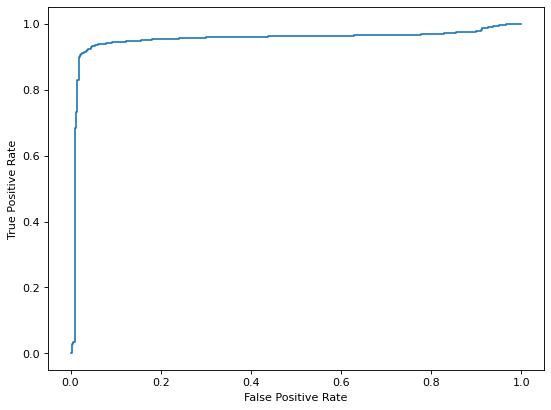

In [64]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, A2_pred_scores[0])
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
metrics.roc_auc_score(y_test, A2_pred_scores[0])

0.9515432887525911

In [66]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, A2_pred[0])
print(cf_matrix)

[[737  43]
 [ 59 844]]


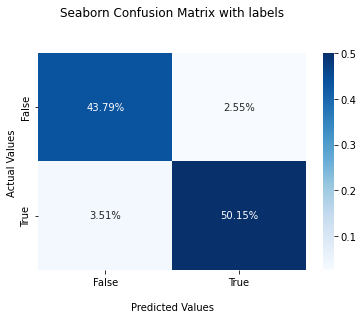

In [67]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()